In [ ]:
import tensorflow as tf
x = tf.ones(shape = (2,1))
print(x)
x = tf.zeros(shape = (2,1))
print(x)
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.3498146 ]
 [ 0.63093615]
 [-2.0250988 ]], shape=(3, 1), dtype=float32)


# Linear Regression

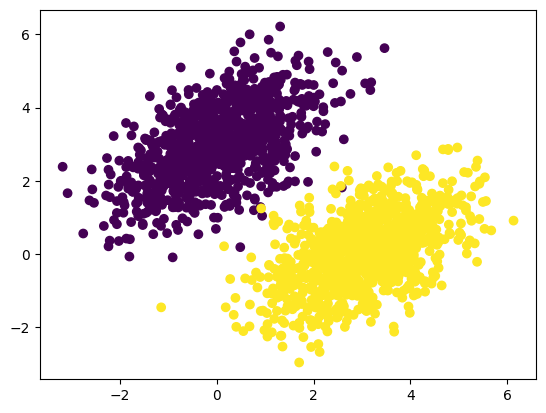

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 3.2244
Loss at step 1: 0.5969
Loss at step 2: 0.2032
Loss at step 3: 0.1370
Loss at step 4: 0.1195
Loss at step 5: 0.1099
Loss at step 6: 0.1021
Loss at step 7: 0.0952
Loss at step 8: 0.0888
Loss at step 9: 0.0831
Loss at step 10: 0.0778
Loss at step 11: 0.0730
Loss at step 12: 0.0687
Loss at step 13: 0.0647
Loss at step 14: 0.0611
Loss at step 15: 0.0579
Loss at step 16: 0.0549
Loss at step 17: 0.0522
Loss at step 18: 0.0497
Loss at step 19: 0.0474
Loss at step 20: 0.0454
Loss at step 21: 0.0435
Loss at step 22: 0.0418
Loss at step 23: 0.0403
Loss at step 24: 0.0389
Loss at step 25: 0.0376
Loss at step 26: 0.0364
Loss at step 27: 0.0353
Loss at step 28: 0.0344
Loss at step 29: 0.0335
Loss at step 30: 0.0327
Loss at step 31: 0.0320
Loss at step 32: 0.0313
Loss at step 33: 0.0307
Loss at step 34: 0.0302
Loss at step 35: 0.0296
Loss at step 36: 0.0292
Loss at step 37: 0.0288
Loss at step 38: 0.0284
Loss at step 39: 0.0281


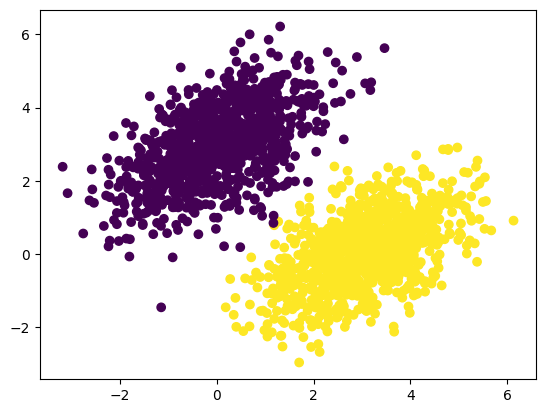

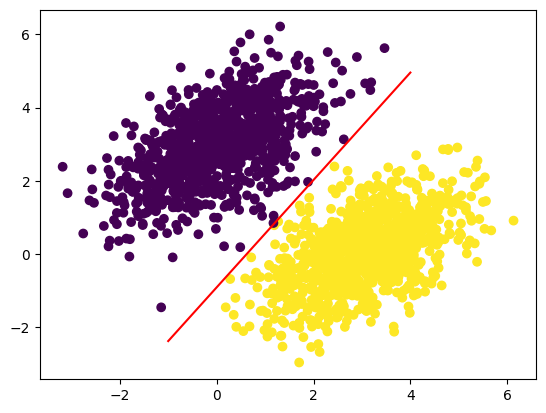

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()


x = np.linspace(-1, 4, 100)
y=-W[0]/ W[1]*x+(0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Inheriting keras.layers.Layers

In [ ]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):

  def __init__(self, units, activation):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer = "random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer = "zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

# def __call__(self, inputs):
#   if not self.built:
#     self.build(inputs.shape)
#     self.built = True
#   return self.call(inputs)

(2, 32)


In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])